In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import os
import random
from sklearn.model_selection import train_test_split

def create_img_dset(fp, label):
    dset = []
    for file in os.listdir(fp):
        curr_fp = fp + f'/{file}'
        img = cv2.imread(curr_fp)
        
        if random.uniform(0, 1) > 0.7:
            img = cv2.GaussianBlur(img, (3, 3), sigmaX=3)

        dset.append((img, label))
    
    return dset

b_train = create_img_dset('./b_train', 0) + create_img_dset('./b_train_extra', 0) + create_img_dset('./mbenign_imgs/', 0)
b_test = create_img_dset('./b_test', 0)
v_files = create_img_dset('./v_files_preprocessed/', 1)

b_train_labels = [0 for i in range(len(b_train))]
b_test_labels = [0 for i in range(len(b_test))]

dataset = np.array(b_train + b_test + v_files[:len(b_train) + len(b_test) - 2])

X_train, X_test, y_train, y_test = train_test_split(dataset[:, 0], dataset[:, 1], test_size=0.2, random_state=40)

C:\Users\Student\AppData\Local\Temp\ipykernel_12684\4183804799.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(b_train + b_test + v_files[:len(b_train) + len(b_test) - 2])


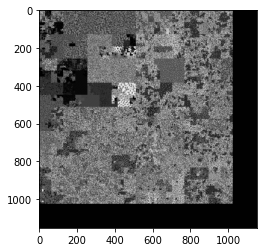

In [2]:
plt.imshow(b_train[random.randint(0, len(b_train)-1)][0])

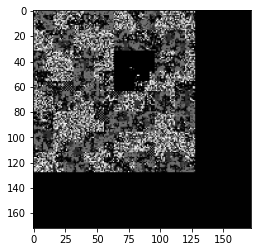

In [3]:
plt.imshow(b_test[random.randint(0, len(b_test)-1)][0])

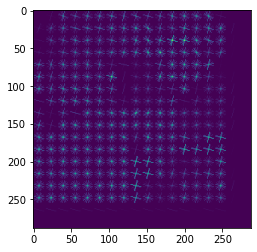

In [4]:
# Histogram of Gradients Feature Extraction
from skimage.feature import hog
from skimage import data, exposure

img = b_train[500][0]
# plt.imshow(img)

def get_hog(img: np.ndarray):
    # print(img.shape)
    fd, hog_image = hog(img, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, channel_axis=-1)

    hog_image_rescaled = exposure.rescale_intensity(hog_image) #, in_range(0, 10))

    return hog_image_rescaled 

hog_image_rescaled = get_hog(img)

plt.imshow(hog_image_rescaled)
# plt.imshow(hog_image)

In [5]:
# hog_b_train = [get_hog(img) for img in b_train]
# hog_b_test = [get_hog(img) for img in b_test]

# idx = 500
# plt.imshow(hog_b_train[idx])

(96, 199)
3663


C:\Users\Student\AppData\Local\Temp\ipykernel_12684\3776565841.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(find_min_s(np.array(b_test)[:, 0]))


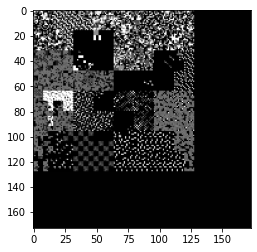

In [6]:
def find_min_s(arr: list) -> int:
    min_s = float('inf')
    min_idx = None 
    for i in range(len(arr)):
        s = arr[i].shape[0]

        if s < min_s:
            min_s = s
            min_idx = i

    return min_s, min_idx

print(find_min_s(np.array(b_test)[:, 0]))
print(np.sum((b_test[199][0] == v_files[4641][0])*1))
plt.imshow(b_test[12][0])
# plt.imshow(arr[min_idx])

(64, 64, 3)


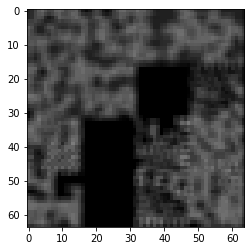

In [7]:
# def euclidean_dist(p1, p2):
#     return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# def thresh(img: np.ndarray, pt):
#     add_mat = [(0, 1), (1, 0), (1, 1), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1)]

#     count = 0
#     for adder in add_mat:
#         i = pt[0] + adder[0]
#         j = pt[1] + adder[1]

#         try:
#             if np.sum(img[i][j]) <= 0:
#                 count += 1
#         except IndexError:
#             pass
    
#     return count

# def cutoff_idx(arr: list) -> int:
#     max_dist = float('-inf')
#     max_coord = None
#     for i in range(len(arr)):
#         for j in range(len(arr[i])):
#             if np.sum(arr[i][j]) != 0 and thresh(img, (i, j)) >= 4:
#                 dist = euclidean_dist((0, 0), (i, j))
#                 if dist > max_dist:
#                     dist = max_dist
#                     max_coord = (i, j)

#     print(max_coord)
    
#     return max(max_coord)

def cutoff_idx(arr: list, buffer) -> int:
    arr = list(arr)
    arr.reverse()

    for i in range(len(arr)):
        if sum(arr[i]) >= buffer:
            # if count > buffer:
            return len(arr) - 1 - i

def crop_img(img: np.ndarray, buffer: int) -> np.ndarray:
    # h_idx = cutoff_idx(img[0, :], buffer)
    # v_idx = cutoff_idx(img[:, 0], buffer)

    arrs = []
    for i in range(15):
        idx = random.randint(0, len(img[0]) // 2)
        if random.randint(0, 1) == 1:
            arrs.append(img[idx, :])
        else:
            arrs.append(img[:, idx])

    idxs = []
    for arr in arrs:
        cutoff = cutoff_idx(arr, buffer)
        if cutoff != None:
            idxs.append(cutoff)

    b_idx = max(idxs)

    return img[:b_idx, :b_idx]

img = crop_img(b_test[5][0], 5)
print(img.shape)
plt.imshow(img)

In [8]:
for i in range(len(X_train)):
    X_train[i] = crop_img(X_train[i], 5)
for i in range(len(X_test)):
    X_test[i] = crop_img(X_test[i], 5)

(63, 432)
(63, 137)


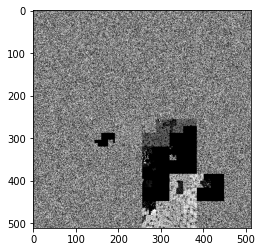

In [9]:
xtr_min = find_min_s(X_train)
xte_min = find_min_s(X_test)

print(xtr_min)
print(xte_min)

plt.imshow(X_train[93])
# plt.imshow(X_test[1079])

In [10]:
def pad_img(img: np.ndarray, des_w: int) -> np.ndarray:
    while len(img[:, 0]) < des_w:
        row = np.zeros((1, len(img[0, :]), 3))
        img = np.vstack((img, row))
    while len(img[0, :]) < des_w:
        col = np.zeros((len(img[:, 0]), 1, 3))
        img = np.column_stack((img, col))

    return img

def rescale_img_arrs(arr):
    narr = []
    for i in range(len(arr)):
        if arr[i].shape[0] < 64:
            narr.append(pad_img(arr[i], 64))
        else:
            img = cv2.resize(arr[i], (64, 64))
            narr.append(img)

    return narr

nxtrain = rescale_img_arrs(X_train)
nxtest = rescale_img_arrs(X_test)

In [11]:
# for i in range(len(nxtrain)):
#     nxtrain[i] = nxtrain[i]/255
# for i in range(len(nxtest)):
#     nxtest[i] = nxtest[i]/255

In [ ]:
laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

plt.imshow(convolve_img(cv2.imread('./lena.png'), laplacian_kernel))

NameError: name 'convolve_img' is not defined

{0: [1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 1.0, 2.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 11.0, 14.0, 1.0, 1.0, 1.0, 1.0, 4.0, 11.0, 15.0, 8.0, 0.0, 10.0, 12.0, 12.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 14.0, 2.0, 13.0, 8.0, 1.0, 4.0, 10.0, 1.0, 1.0, 1.0, 12.0, 1.0, 8.0, 8.0, 12.0, 14.0, 1.0, 8.0, 1.0, 12.0, 1.0, 10.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 8.0, 15.0, 1.0, 14.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 14.0, 12.0, 1.0, 12.0, 1.0, 8.0, 1.0, 2.0, 14.0, 14.0, 10.0, 12.0, 11.0, 8.0, 4.0, 1.0, 1.0, 1.0, 1.0, 2.0, 11.0, 1.0, 11.0, 9.0, 1.0, 9.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 9.0, 11.0, 4.0, 1.0, 1.0, 1.0, 1.0, 8.0, 9.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 12.0, 1.0, 15.0, 1.0, 8.0, 4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 15.0, 1.0, 1.0, 12.0, 14.0, 15.0, 11.0, 8.0, 7.0, 14.0, 8.0, 14.0, 12.0, 12.0, 10.0, 1.0, 7.0, 1.0, 1.0, 9.0, 14.0, 1.0, 11.0, 1.0, 14.0, 1.0, 15.0, 1.0, 1.0, 1.0, 1.0, 15.0, 1.0, 12.0, 12.0, 1.0, 1.0, 1.0, 11.0, 1.0, 1.0, 8.0, 11.0, 1.0, 1.0,

C:\Users\Student\AppData\Local\Temp\ipykernel_12684\206051380.py:28: RuntimeWarning: divide by zero encountered in divide
  orientation_matrix = np.divide(y_grad, x_grad)
C:\Users\Student\AppData\Local\Temp\ipykernel_12684\206051380.py:28: RuntimeWarning: invalid value encountered in divide
  orientation_matrix = np.divide(y_grad, x_grad)


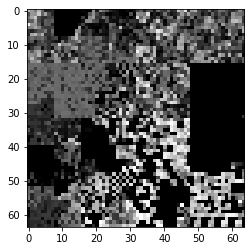

In [11]:
# HOG feature extraction
img = nxtrain[2]
plt.imshow(img)

x_grad_kernel = np.array([[ 0, 0, 0],
                          [-1, 0, 1],
                          [ 0, 0, 0]])

y_grad_kernel = np.array([[0, -1, 0],
                          [0,  0, 0],
                          [0,  1, 0]])

x_grad_kernel = np.array([[ 1, 0, 1],
                          [-2, 0, 2],
                          [ 1, 0, 1]])

y_grad_kernel = np.array([[1, -2, 1],
                          [0,  0, 0],
                          [1,  2, 1]])

def convolve_img(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    return cv2.filter2D(img, -1, kernel)

def gradient_magnitude(x_grad: np.ndarray, y_grad: np.ndarray):
    return np.sqrt(x_grad**2 + y_grad**2)

def gradient_orientation(x_grad: np.ndarray, y_grad: np.ndarray):
    orientation_matrix = np.divide(y_grad, x_grad)
    orientation_matrix[np.isnan(orientation_matrix)] = 0

    return np.arctan(orientation_matrix)#  * (180 / np.pi)

def find_closest_bin(val: int, bins: list) -> tuple:
    val = np.sum(val)//3

    # print(val)

    for i in range(len(bins)):
        if val == bins[i]:
            return bins[i]

    x1 = 0
    x2 = 20

    for i in range(len(bins)):
        if val > x1 and val < x2:
            return (x1, x2)

        x1 += 20
        x2 += 20

    min_dist = float('inf')
    closest_bin = None
    for i in range(len(bins)):
        dist = abs(val - np.sum(bins[i])//3)

        if dist < min_dist:
            closest_bin = bins[i]
            dist = min_dist

    if val > closest_bin:
        return (closest_bin, closest_bin + 20)
    elif val < closest_bin:
        return (closest_bin - 20, closest_bin)
    elif val == closest_bin:
        return closest_bin

def bin_creation(mag_mat: np.ndarray, or_mat: np.ndarray) -> dict:
    bins = [i for i in range(0, 180, 20)]
    histogram = {}

    for bin in bins:
        histogram.update({bin: []})

    for i in range(len(mag_mat)):
        for j in range(len(mag_mat[i])):
            magnitude = np.sum(mag_mat[i][j])//3
            direction = np.sum(or_mat[i][j])//3

            # print(direction)

            closest_bin = find_closest_bin(direction, bins)

            if type(closest_bin) == tuple:
                lbound = closest_bin[0]
                ubound = closest_bin[1]

                udiff = ubound - direction
                ldiff = direction - lbound

                histogram[lbound].append((udiff/lbound)*magnitude)
                histogram[ubound].append((ldiff/lbound)*magnitude)
            elif type(closest_bin) == int:
                histogram[closest_bin].append(magnitude)
    
    return histogram

def extract_HOG_features(img: np.ndarray):
    x_grad, y_grad = convolve_img(img, x_grad_kernel), convolve_img(img, y_grad_kernel)
    magnitude_matrix = gradient_magnitude(x_grad, y_grad)
    orientation_matrix = gradient_orientation(x_grad, y_grad)

    histogram = bin_creation(magnitude_matrix, orientation_matrix)
    
    return histogram

histogram = extract_HOG_features(img)
print(histogram)

took 0.0s


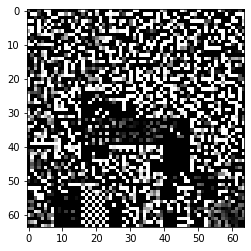

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

def convolve_img(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    return cv2.filter2D(img, -1, kernel)

laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

x_grad_kernel = np.array([[ 0, 0, 0],
                          [-1, 0, 1],
                          [ 0, 0, 0]])

y_grad_kernel = np.array([[0, -1, 0],
                          [0,  0, 0],
                          [0,  1, 0]])

img = cv2.imread('./lena.png')
img = nxtrain[0]

x_grad = convolve_img(img, x_grad_kernel)
y_grad = convolve_img(img, y_grad_kernel)

start = time.time()
lap_img = convolve_img(img, laplacian_kernel)
print(f"took {time.time() - start}s")

cv2.imwrite('lap_img.png', lap_img)

# plt.imshow(x_grad + y_grad)
plt.imshow(lap_img)

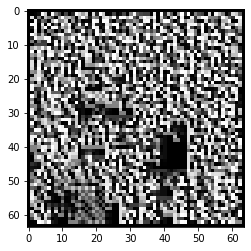

In [13]:
from LBP import extract_lbp

lbp_img = extract_lbp(nxtrain[0][:, :, 0])
plt.imshow(lbp_img, cmap='gray')

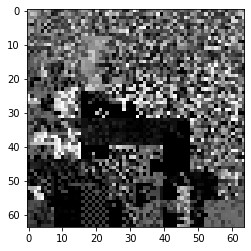

In [14]:
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)
plt.imshow(nxtrain[0])

In [16]:
import torchvision.transforms as T
from PIL import Image

# img = Image.fromarray(onxtrain[0])

transform = T.Compose([
   T.ToTensor(),
#    T.Resize(256),
#    T.CenterCrop(224),
#    T.Normalize(
#        mean=[0.485, 0.456, 0.406],
#        std=[0.229, 0.224, 0.225]
#    )
])

timg = transform(img)
print(timg.size())
# plt.imshow(timg[0])

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [ ]:
# onxtrain = nxtrain
# onxtest = nxtest

# nxtrain = []
# nxtest = []

for i in range(len(nxtrain)):
    arr = transform(Image.fromarray(nxtrain[i].astype(np.uint8)))
    arr = arr.cpu().detach().numpy()
    nxtrain[i] = arr[0]
for i in range(len(nxtest)):
    arr = transform(Image.fromarray(nxtest[i].astype(np.uint8)))
    arr = arr.cpu().detach().numpy()
    nxtest[i] = arr[0]

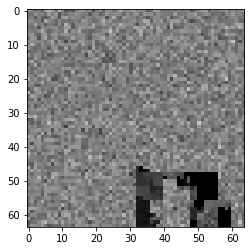

In [15]:
plt.imshow(nxtrain[100])

In [44]:
# CNN because i dont wanna deal wtih HOG stuff rn
# nxtrain, nxtest, y_train, y_test

import torch
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 4, 3, padding=1)
        self.conv2 = nn.Conv2d(4, 8, 2, padding=1)
        self.conv3 = nn.Conv2d(8, 16, 1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)

        self.dropout = nn.Dropout(p=0.2)
        self.dropout2 = nn.Dropout(p=0.2)

        self.l1 = nn.Linear(1024, 256)
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = self.dropout(x)
        
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = self.dropout(x)
        
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        x = self.dropout(x)

        x = torch.flatten(x)

        x = F.relu(self.l1(x))
        x = self.dropout2(x)

        x = F.relu(self.l2(x))
        x = self.dropout2(x)
        
        x = F.relu(self.l3(x))
        x = self.dropout2(x)
        
        x = F.relu(self.l4(x))
        x = self.dropout2(x)

        x = torch.sigmoid(self.out(x))

        return x

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = torch.nn.Sequential(
            nn.Conv2d(3, 64, 5),
            nn.Conv2d(64, 128, 5),
        )
        self.decoder = torch.nn.S

In [45]:
class EarlyStopping():
    def __init__(self, tolerance=5, min_delta=0):

        self.tolerance = tolerance
        self.min_delta = min_delta
        self.counter = 0
        self.early_stop = False

    def __call__(self, train_loss, validation_loss):
        if (validation_loss - train_loss) > self.min_delta:
            self.counter +=1
            if self.counter >= self.tolerance:  
                self.early_stop = True

In [46]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from LBP import extract_lbp
from skimage.feature import local_binary_pattern

def convolve_img(img: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    return cv2.filter2D(img, -1, kernel)

laplacian_kernel = np.array([[-1, -1, -1],
                             [-1,  8, -1],
                             [-1, -1, -1]])

ksize = 5
sigma = 5
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.1
phi = 0

gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

radius = 3
num_points= 8 * radius

# model = models.resnet18(pretrained=True)# CNN()
model = CNN()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)# , momentum=0.9)
# optimizer = optim.Adam(model.parameters(),lr=0.0001,betas=(0.9,0.999),eps=1e-08,weight_decay=0,amsgrad=False)

losses = []
tst_losses = []
trn_acc = []
tst_acc = []

early_stopping = EarlyStopping(tolerance=10, min_delta=0.05)

BATCH_SIZE = len(nxtrain)
c1 = 0
c2 = BATCH_SIZE
        
reset_batch = False

min_loss = float('inf')
for epoch in range(250):
    closs = 0
    train_pred = 0
    for i in range(c1, c2, 1):
        preds = model(torch.Tensor([nxtrain[i][:, :, 0]]))

        if preds >= 0.5:
            pred = 1
        else:
            pred = 0
        
        if pred == y_train[i]:
            train_pred += 1

        # print(preds[0], y)

        loss = criterion(preds, torch.Tensor([y_train[i]]))

        closs += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    c1 += BATCH_SIZE
    c2 += BATCH_SIZE

    if c2 > len(nxtrain):
        c2 = len(nxtrain)
        reset_batch = True
    
    # if closs/len(nxtrain) < min_loss:
    #     npath = './model_Gabor_Laplacian_HCURVE_dropout0_3_150epochs'
    #     torch.save(model.state_dict(), npath)
    #     min_loss = closs/len(nxtrain)
    #     print(f"Model Saved - Loss {min_loss}")

    pred_count = 0
    tmp_loss = 0
    for i in range(len(nxtest[:100])):
        pred = model(torch.Tensor([nxtest[i][:, :, 0]]))
        
        loss = criterion(pred, torch.Tensor([y_test[i]]))
        tmp_loss += loss.item()
        
        pred = pred.cpu().detach().numpy()[0]

        if pred >= 0.5:
            pred = 1
        else:
            pred = 0
        

        if pred == y_test[i]: 
            pred_count += 1

    # trn_acc.append(train_pred/len(nxtrain)) 
    trn_acc.append(train_pred/BATCH_SIZE) 
    losses.append(closs/BATCH_SIZE)
    tst_acc.append(pred_count/100)
    tst_losses.append(tmp_loss/100)
    # losses.append(closs/len(nxtrain))

    # early_stopping(losses[-1], tst_losses[-1])
    # if early_stopping.early_stop:
    #     print(f"EARLY STOPPED AT EPOCH {epoch}")
    #     break

    print(f"[ Epoch {epoch} | Train Acc {round(trn_acc[-1], 4)} Test Acc {round(tst_acc[-1], 4)} | TRN LOSS {round(losses[-1], 4)} TST LOSS {round(tst_losses[-1], 4)} ]")
    if reset_batch:
        c1 = 0
        c2 = BATCH_SIZE

[ Epoch 0 | Train Acc 0.5056 Test Acc 0.51 | TRN LOSS 0.7016 TST LOSS 0.7008 ]
[ Epoch 1 | Train Acc 0.5319 Test Acc 0.54 | TRN LOSS 0.6912 TST LOSS 0.6773 ]
[ Epoch 2 | Train Acc 0.5439 Test Acc 0.53 | TRN LOSS 0.6883 TST LOSS 0.6796 ]
[ Epoch 3 | Train Acc 0.5418 Test Acc 0.56 | TRN LOSS 0.6868 TST LOSS 0.6794 ]
[ Epoch 4 | Train Acc 0.5634 Test Acc 0.52 | TRN LOSS 0.6837 TST LOSS 0.6837 ]
[ Epoch 5 | Train Acc 0.5602 Test Acc 0.59 | TRN LOSS 0.6833 TST LOSS 0.6797 ]
[ Epoch 6 | Train Acc 0.5879 Test Acc 0.67 | TRN LOSS 0.6742 TST LOSS 0.6728 ]
[ Epoch 7 | Train Acc 0.5889 Test Acc 0.61 | TRN LOSS 0.6683 TST LOSS 0.6596 ]
[ Epoch 8 | Train Acc 0.5974 Test Acc 0.58 | TRN LOSS 0.6612 TST LOSS 0.6687 ]
[ Epoch 9 | Train Acc 0.6132 Test Acc 0.59 | TRN LOSS 0.6533 TST LOSS 0.6338 ]
[ Epoch 10 | Train Acc 0.6182 Test Acc 0.64 | TRN LOSS 0.6435 TST LOSS 0.6476 ]
[ Epoch 11 | Train Acc 0.6475 Test Acc 0.65 | TRN LOSS 0.6241 TST LOSS 0.6185 ]
[ Epoch 12 | Train Acc 0.6744 Test Acc 0.63 | TRN 

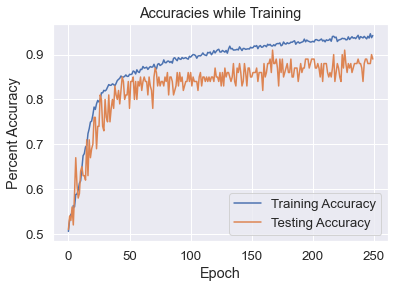

In [47]:
plt.plot(trn_acc, label='Training Accuracy')
plt.plot(tst_acc, label='Testing Accuracy')
# plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Percent Accuracy')
plt.title('Accuracies while Training')
plt.legend()

Text(0.5, 1.0, 'Loss')

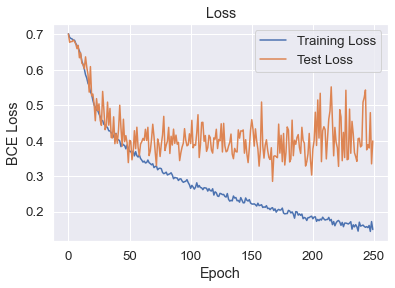

In [48]:
plt.plot(losses, label='Training Loss')
plt.plot(tst_losses, label='Test Loss')
# plt.plot(trn_acc, label='Training Accuracy')
# plt.plot(tst_acc, label='Testing Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.title('Loss')

In [22]:
# msaved = torch.load('./model_85-25_dropout')
# msaved = torch.load('model_Gabor_Laplacian_HCURVE_dropout0_3_150epochs')
# nmodel = CNN()
# nmodel.load_state_dict(msaved) 

<All keys matched successfully>

In [24]:
import torch
import numpy as np
import cv2

msaved = torch.load('./model_87_NEWEST_newdat_convdrop_ldrop_64x64arch')
model = CNN()
model.load_state_dict(msaved)

<All keys matched successfully>

In [49]:
model.eval()

right = 0

y_pred = []

ksize = 5
sigma = 5
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.1
phi = 0

gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

for i in range(len(nxtest)):
    arr = nxtest[i]

    # arr = [arr[:, :, 0], get_hog(arr), extract_lbp(arr[:, :, 0])]
    # lbp = local_binary_pattern(nxtrain[i][:, :, 0], num_points, radius).astype(np.uint8)
    # pred = model(torch.Tensor([lbp]))
    # laplacian_conv = convolve_img(arr, laplacian_kernel)[:, :, 0]
    # gabor_conv = convolve_img(arr, gabor_kernel)[:, :, 0]

    # X = torch.Tensor([arr[:, :, 0], laplacian_conv, gabor_conv])# nxtrain[epoch])
    # X = torch.Tensor([arr[:, :, 0], arr[:, :, 1], arr[:, :, 2]])# nxtrain[epoch])
    # X = torch.Tensor([arr[:, :, 0]])# nxtrain[epoch])
    
    # pred = model(torch.Tensor([nxtest[i]]))
    pred = model(torch.Tensor([nxtest[i][:, :, 0]]))
    
    pred = pred.cpu().detach().numpy()[0]

    if pred > 0.6:
        pred = 1
    else:
        pred = 0

    y_pred.append(pred)

    if pred == y_test[i]:
        right += 1

print(f"Accuracy: {round(right/len(nxtest)*100, 2)}%")

Accuracy: 90.32%


In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

y_acc = y_test.astype(np.uint8) # y_actu.astype(np.uint8)
y_pred = np.array(y_pred).astype(np.uint8)

cmat = confusion_matrix(y_acc, y_pred)
print(cmat)
print(accuracy_score(y_acc, y_pred))

[[438  20]
 [ 71 411]]
0.9031914893617021


Accuracy: 90.31914893617021%
Sensitivity/Recall: 0.8605
Specificity/Precision: 0.9536
F1 Score: 0.9047
AUC Score: 0.9213


[Text(0.5, 1.0, '\nCNN Confusion Matrix\n')]

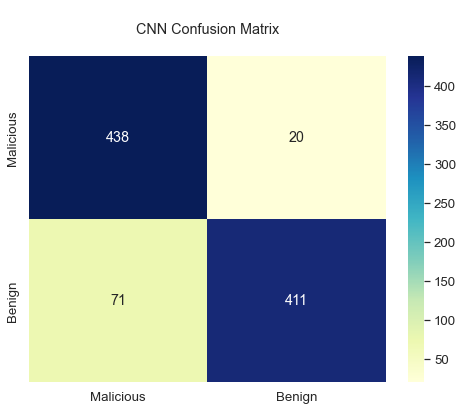

In [51]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import roc_auc_score 

inline_rc = dict(mpl.rcParams)

df_cm = pd.DataFrame(cmat, index=["Malicious", "Benign"], columns = ["Malicious", "Benign"])

# plt.figure()
# plt.imshow(cmat, interpolation='nearest', cmap=plt.cm.Blues)
# tick_marks = np.arange(2)
# classNames = ["Malicious", "Benign"]

# # thresh = confusion_matrix.max() / 2.
# for i in range(cmat.shape[0]):
#     for j in range(cmat.shape[1]):
#         plt.text(j, i, format(cmat[i, j]), 
#         ha='center', va='center', 
#         color='white' if cmat[i, j] > 100 else "black")

# plt.tight_layout()
# plt.colorbar()
# plt.show()
plt.figure(figsize=(8, 6))
# sn.heatmap(df_cm, annot=True, cmap='YlGnBu')# , cmap="blue")
sn.set(font_scale=1.2)
# sn.set(font="Verdana")

y_s_pred = []

for i in range(len(nxtest)):
    arr = nxtest[i]

    # arr = [arr[:, :, 0], get_hog(arr)]

    # pred = model(torch.Tensor(arr))
    # img = [nxtest[i][:, :, 0], nxtest[i][:, :, 1], nxtest[i][:, :, 2]]
    # pred = model(torch.Tensor([img[0], convolve_img(nxtest[i], laplacian_kernel)[:, :, 0]]))
    # laplacian_conv = convolve_img(arr, laplacian_kernel)[:, :, 0]
    # gabor_conv = convolve_img(arr, gabor_kernel)[:, :, 0]

    # X = torch.Tensor([arr[:, :, 0], laplacian_conv, gabor_conv])# nxtrain[epoch])
    # X = torch.Tensor([arr[:, :, 0], arr[:, :, 1], arr[:, :, 2]])# nxtrain[epoch])
    X = torch.Tensor(torch.Tensor([arr[:, :, 0]]))# nxtrain[epoch])

    pred = model(X)

    pred = pred.cpu().detach().numpy()[0]

    y_s_pred.append(pred)

# y_b_pred = (np.array(y_pred) >= 0.5)*1

TP = cmat[0, 0]
FP = cmat[0, 1]
FN = cmat[1, 0]
TN = cmat[1, 1]

# what proportion of positive class was correclty classified
recall = TP/(TP+FN)
# what proportion of negative class was correctly classified
precision = TN/(TN+FP)

f1_score = 2*(precision*recall)/(precision+recall) 

auc = roc_auc_score(y_test.astype(np.uint8), y_s_pred)

print(f"Accuracy: {accuracy_score(y_acc, y_pred) * 100}%")
# print(f"Accuracy: 85.25%")
print(f"Sensitivity/Recall: {round(recall, 4)}")
print(f"Specificity/Precision: {round(precision, 4)}")
print(f"F1 Score: {round(f1_score, 4)}")
print(f"AUC Score: {round(auc, 4)}")

sn.heatmap(df_cm, annot=True, cmap='YlGnBu', fmt='d').set(title='\nCNN Confusion Matrix\n')

Text(0, 0.5, 'True Positive Rate')

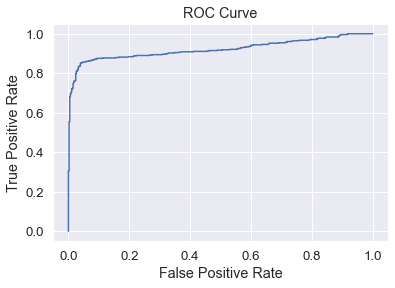

In [52]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score 
fpr, tpr, thresholds = roc_curve(y_test.astype(np.uint8), y_s_pred) 
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

pred MALICIOUS label BENIGN


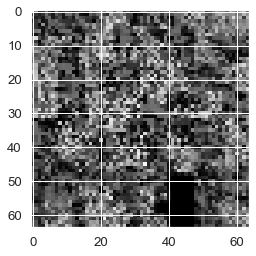

In [128]:
ch_class = (y_pred == y_test)*1

misclass = []
for i in range(len(y_pred)):
    if y_pred[i] != y_test[i]:
        misclass.append([nxtest[i], y_pred[i], y_test[i]])

idx = 2
img, pred_class, label = misclass[idx]
l_hash = {1: "Malicious", 0: "Benign"}
print(f"pred {l_hash[pred_class].upper()} label {l_hash[label].upper()}")
plt.imshow(img)

In [43]:
torch.save(model.state_dict(), './model_9032')

(array([1891., 1865.]),
 array([0.0, 0.5, 1.0], dtype=object),
 <BarContainer object of 2 artists>)

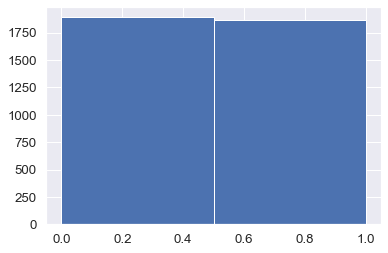

In [53]:
plt.hist(y_train, bins=2)

(array([458., 482.]),
 array([0.0, 0.5, 1.0], dtype=object),
 <BarContainer object of 2 artists>)

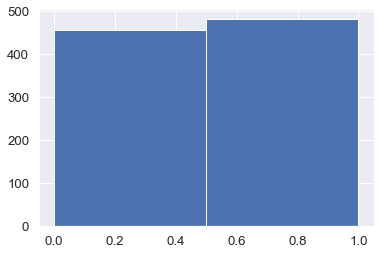

In [54]:
plt.hist(y_test, bins=2)

In [86]:
correct = ((np.array(y_s_pred) > 0.5)*1 == y_test)*1

np.sum(correct)/len(correct)

0.8795888399412628

In [101]:
count = 0
thresh = 0.5
for i in range(len(y_s_pred)):
     if (y_s_pred[i] >= thresh) and y_test[i] == 1:
        count += 1
     elif (y_s_pred[i] < thresh) and y_test[i] == 0:
        count += 1
   
print(count / len(y_test))

0.8649045521292217


In [180]:
from torchcrf import CRF

prep = CRF(1)

img = nxtrain[0]

prep(torch.Tensor(img), 1)

ValueError: expected last dimension of emissions is 1, got 3

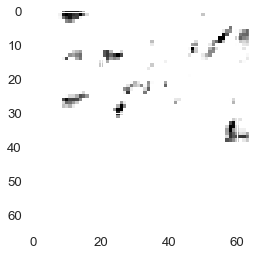

In [203]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

ksize = 5
sigma = 5
theta = 1*np.pi/4
lamda = 1*np.pi/4
gamma = 0.1
phi = 0

kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)

idx = 1000
# plt.imshow(nxtrain[idx])
plt.imshow(convolve_img(nxtrain[idx], kernel))

In [ ]:
torch.save(model.state_dict(), './model_LBP')

In [164]:
arr = np.ones((5, 5, 3))

# arr[1][1] = 20

print(arr.shape)

tot = arr.sum(axis=0).sum(axis=0)/(arr.shape[0]*arr.shape[1])
tot/np.linalg.norm(tot, ord=None)

(5, 5, 3)


array([0.57735027, 0.57735027, 0.57735027])

In [31]:
msaved = torch.load('./model_85-25_dropout')
model = CNN()
model.load_state_dict(msaved) 

<All keys matched successfully>

In [36]:
y_pred = []

right = 0
for i in range(len(y_test)):
    img = [nxtest[i][:, :, 0], nxtest[i][:, :, 1], nxtest[i][:, :, 2]]

    pred = model(torch.Tensor(img))

    mpred = None
    if pred >= 0.5:
        mpred = 1
    else:
        mpred = 0
    
    if mpred == y_test[i]:
        right += 1

print(right/len(y_test))

0.86


In [210]:
arr = np.array([
    [[1, 2, 4], [1, 2, 3], [4, 3, 5]],
    [[1, 2, 4], [1, 2, 3], [4, 3, 5]],
    [[1, 2, 4], [1, 2, 3], [4, 3, 5]]
])

print([arr[:, :, 0], arr[:, :, 1], arr[:, :, 2]])
print(arr[:, :, 0])

[array([[1, 1, 4],
       [1, 1, 4],
       [1, 1, 4]]), array([[2, 2, 3],
       [2, 2, 3],
       [2, 2, 3]]), array([[4, 3, 5],
       [4, 3, 5],
       [4, 3, 5]])]
[[1 1 4]
 [1 1 4]
 [1 1 4]]


In [114]:
mat = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

np.arctan(np.divide(mat, 2*mat))

array([[0.46364761, 0.46364761, 0.46364761],
       [0.46364761, 0.46364761, 0.46364761],
       [0.46364761, 0.46364761, 0.46364761]])

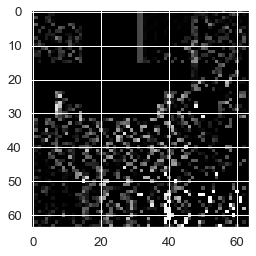

In [585]:
plt.imshow(x_grad)

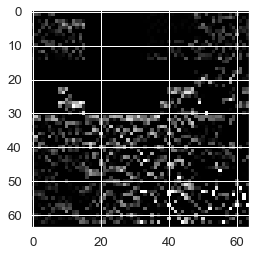

In [586]:
plt.imshow(y_grad)

In [52]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

arr = np.column_stack((arr, [1, 2, 3]))
np.vstack((arr, [1, 2, 3, 4]))

array([[1, 2, 3, 1],
       [4, 5, 6, 2],
       [7, 8, 9, 3],
       [1, 2, 3, 4]])

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class AlexNet()

SyntaxError: expected ':' (4158991503.py, line 5)